## Step 1: Download images of dinosaurs

In [1]:
!pip install gradio -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 3.7.4 requires typer<0.10.0,>=0.3.0, but you have typer 0.15.1 which is incompatible.
weasel 0.3.4 requires typer<0.10.0,>=0.3.0, but you have typer 0.15.1 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


## Step 2: Create Datablock to load images

To train a model, we'll need `DataLoaders`, which is an object that contains a *training set* (the images used to create a model) and a *validation set* (the images used to check the accuracy of a model -- not used during training). In `fastai` we can create that easily using a `DataBlock`, and view sample images from it:

In [2]:
from fastai.vision.all import *
path = Path('dinosaurs')

In [3]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(256)],
    batch_tfms=aug_transforms(size=224),
).dataloaders(path)

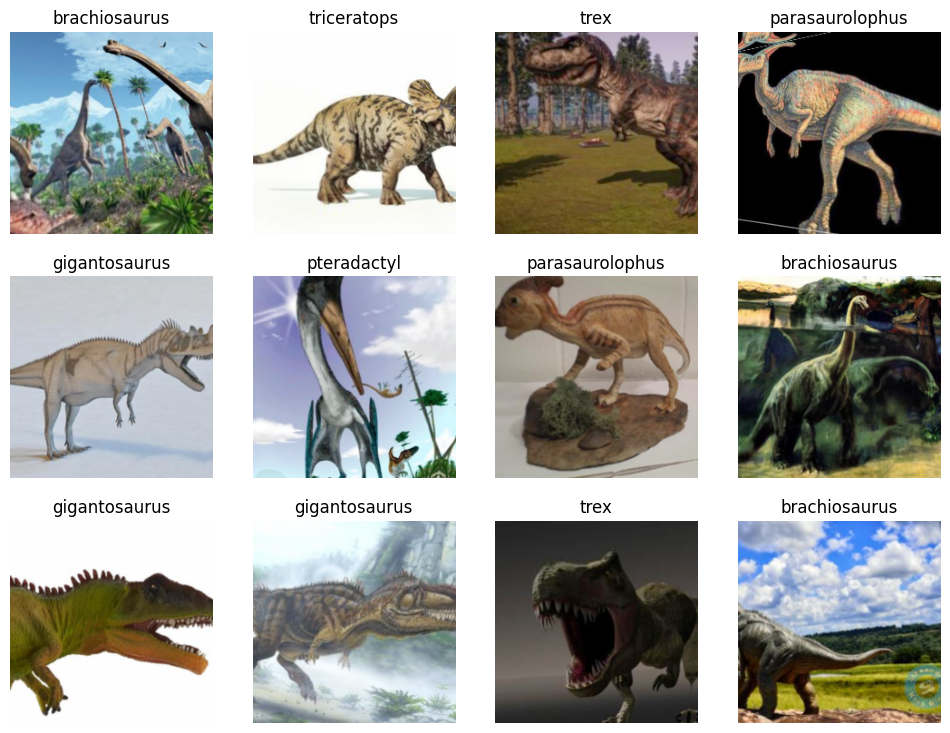

In [4]:
dls.show_batch(max_n=12)

## Step 3: Define Learner

In [5]:
learn = vision_learner(dls, 'seresnext50_32x4d', metrics=error_rate)

model.safetensors:   0%|          | 0.00/111M [00:00<?, ?B/s]

In [6]:
learn.load('dino2_resnext50')

## Step 4: Define Prediction function

In [7]:
def find_character(img):
    character,_,probs = learn.predict(img)
    probs = [o.item() for o in probs]
    
    return dict(zip(dls.vocab,probs))

## Step 5: Define Deshboard Parameters for Gradio

In [8]:
#create an example dir for sample images to predict from 
#Users can alternatively upload the images of their choice.
EXAMPLES_PATH = Path('examples') 

In [9]:
with open('article.md') as f:
    article = f.read()

In [22]:
interface_options = {
    "title": " Tell me which dinosaur is this 🦖 🦕?",
    "description": "Prehistoric dinosaurs finder using fastai library deployed on JarvisLabs.ai dashboard by Gradio",
    "examples" : [f'{EXAMPLES_PATH}/{f.name}' for f in EXAMPLES_PATH.iterdir()],
    "article":article,
    #"layout": "horizontal",
    "theme": "default",
    "flagging_mode": "never"
}

In [23]:
import gradio as gr
demo = gr.Interface(fn=find_character, 
                    # inputs=gr.inputs.Image(shape=(256, 256)),
                    inputs=gr.Image(),
                    #outputs= gr.outputs.Label(num_top_classes=3), 
                    outputs= gr.Label(num_top_classes=3),
                    **interface_options)

In [24]:
if __name__ == "__main__":
    demo.launch(server_name="0.0.0.0",server_port=6006)

* Running on local URL:  http://0.0.0.0:6006

To create a public link, set `share=True` in `launch()`.
